In [64]:
import numpy as np
import requests
import cv2
import matplotlib.pyplot as plt
import math
import io

In [137]:
output = {'image': 'https://replicate.delivery/pbxt/aE3yr9Wo3I4nK14wcekLCjDl8fSl1JboxfwAywEB6xV6hGPkA/out.png', 'jsona': 'https://replicate.delivery/pbxt/ddR3Dgvf2iS8Rq157pOOof5opEeS6zfSMJpUURfHPt71Ha8QC/output.json'}

body = requests.get(output["image"])

In [138]:
def show_image(img):
    plt.imshow(img)
    plt.colorbar()

In [139]:
image_array = np.asarray(bytearray(body.content), dtype=np.uint8)
image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
cv2.imwrite("original_image.jpg", image)

True

In [140]:
CHUNK_SIZE = 8
T = np.full((CHUNK_SIZE, CHUNK_SIZE), None)
for i in range(CHUNK_SIZE):
    for j in range(CHUNK_SIZE):
        if i == 0:
            T[i][j] = 1/(CHUNK_SIZE**0.5)
        else:
            T[i][j] = (2/CHUNK_SIZE)**0.5 * math.cos(((2 * j + 1) * i * math.pi)/(2 * CHUNK_SIZE))

T_t = T.transpose()

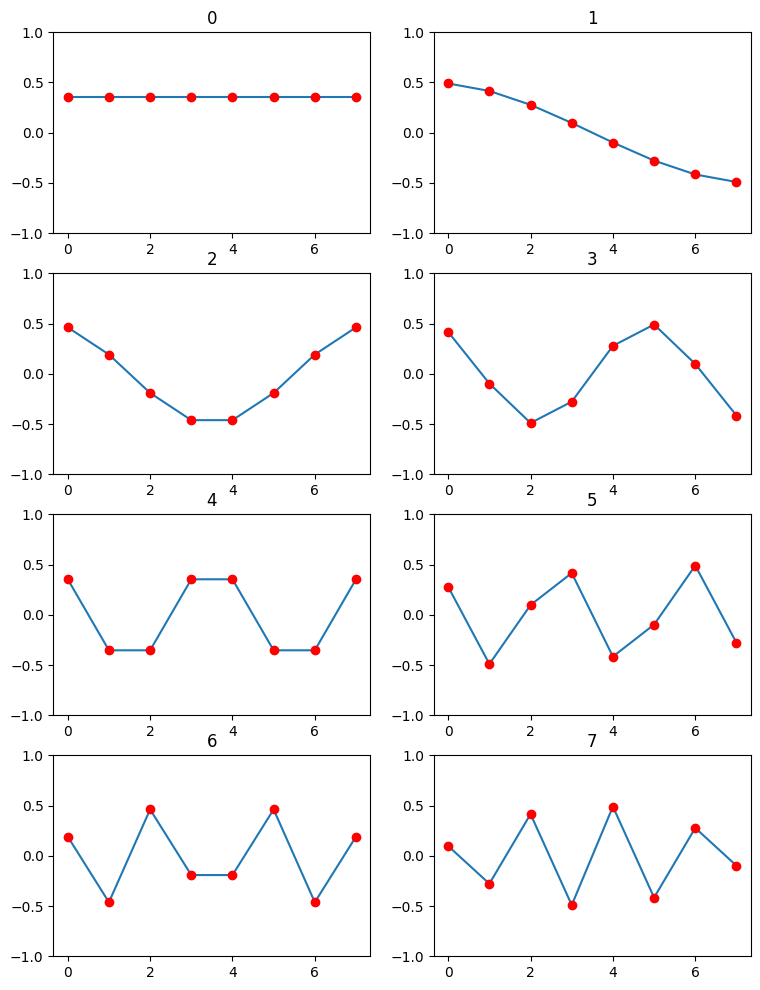

In [141]:
# Here's what they look like.
plt.figure(figsize=(9,12))
for u in range(CHUNK_SIZE):
    plt.subplot(4, 2, u+1)
    plt.ylim((-1, 1))
    plt.title(str(u))
    plt.plot(T[u, :])
    plt.plot(T[u, :],'ro')

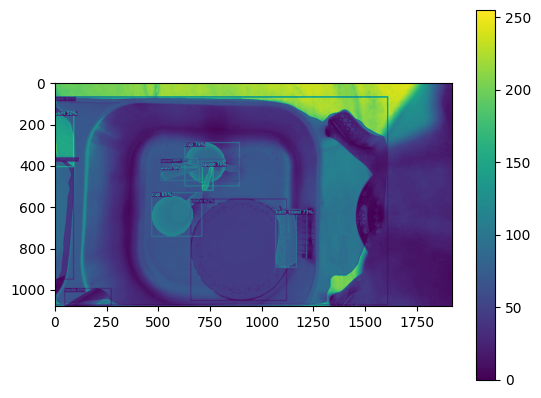

In [142]:
red_channel = image[:,:,0].copy()
red_subset = image[0: 8, 0: 8, 0].copy()

show_image(red_channel)

In [155]:
i = 0
j = 0
Q_50 = np.array([
    [16, 11, 10, 16, 24, 40, 51, 61],
    [12, 12, 14, 19, 26, 58, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56],
    [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77],
    [24, 35, 55, 64, 81, 104, 113, 92],
    [49, 62, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103, 99]
])
total_image = np.zeros_like(image)

new_image_red = None
for channel in range(image.shape[2]):
    new_image = image[:, : , channel].copy()
    i = 0
    while i  < len(red_channel):
        j = 0
        while j < len(red_channel[i]):
            chunk = image[i : i + CHUNK_SIZE,j : j + CHUNK_SIZE, channel].copy()
            dcted_chunk = T.dot(chunk - 128).dot(T_t).astype(np.double)
            tmp  = (dcted_chunk/Q_50).round()
            R = Q_50 * tmp
            N = T_t.dot(R).dot(T).astype(np.double).round() + 128

            new_image[i: i + CHUNK_SIZE, j : j + CHUNK_SIZE] = N
            j += CHUNK_SIZE
        i += CHUNK_SIZE
    
    if channel == 0:
        new_image_red = new_image.copy()
    
    total_image[:, :, channel] = new_image


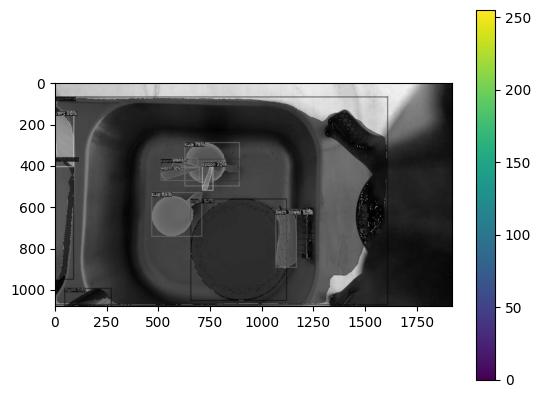

In [156]:
show_image(total_image)

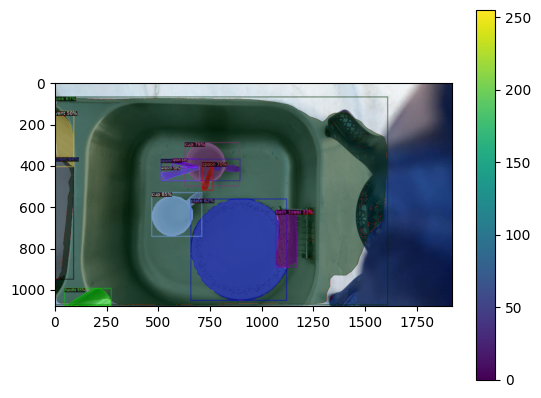

In [129]:
show_image(image)

In [160]:
cv2.imwrite("original_image.bmp", image)
cv2.imwrite("compressed_image.bmp", total_image)

True

In [162]:
image

array([[[189, 208, 216],
        [189, 208, 216],
        [190, 209, 217],
        ...,
        [ 27,  39,  75],
        [ 22,  34,  70],
        [ 18,  30,  66]],

       [[188, 207, 215],
        [188, 207, 215],
        [189, 208, 216],
        ...,
        [ 23,  35,  71],
        [ 20,  32,  68],
        [ 19,  31,  67]],

       [[188, 207, 215],
        [188, 207, 215],
        [189, 208, 216],
        ...,
        [ 16,  28,  64],
        [ 19,  31,  67],
        [ 21,  33,  69]],

       ...,

       [[135, 169, 198],
        [135, 169, 198],
        [135, 169, 198],
        ...,
        [ 16,  24,  71],
        [  8,  16,  63],
        [  7,  15,  62]],

       [[136, 170, 199],
        [135, 169, 198],
        [135, 169, 198],
        ...,
        [ 13,  21,  68],
        [  7,  15,  62],
        [  7,  15,  62]],

       [[136, 170, 199],
        [136, 170, 199],
        [135, 169, 198],
        ...,
        [ 12,  20,  67],
        [  9,  17,  64],
        [  9,  17,  64]]

In [158]:
_, buffer = cv2.imencode(".jpg", image)
io_buf = io.BytesIO(buffer)
io_buf.getbuffer().nbytes

408331

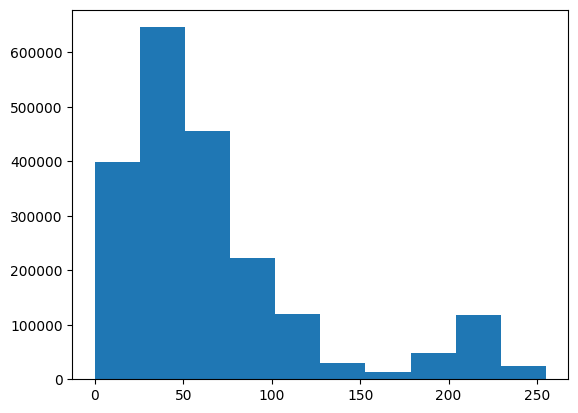

In [81]:
plt.hist(new_image.flatten())
plt.show()

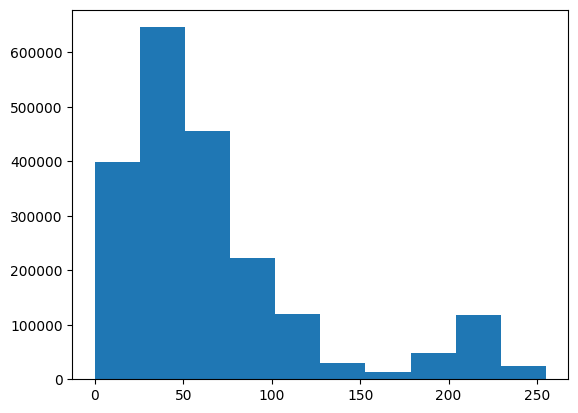

In [80]:
plt.hist(red_channel.flatten())
plt.show()

255

In [23]:
dcted = T.dot(red_channel).dot(T_t).astype(np.double)
undcted = T_t.dot(dcted).dot(T).astype(np.double)

ValueError: shapes (8,8) and (1080,1920) not aligned: 8 (dim 1) != 1080 (dim 0)

In [39]:
test_matrix = np.array([
    [154,123,123,123,123,123,123,136],
    [192,180,136,154,154,154,136,110],
    [254,198,154,154,180,154,123,123],
    [239,180,136,180,180,166,123,123],
    [180,154,136,167,166,149,136,136],
    [128,136,123,136,154,180,198,154],
    [123,105,110,149,136,136,180,166],
    [110,136,123,123,123,136,154,136]
])

In [42]:
dct_test = T.dot(test_matrix - 128).dot(T_t).astype(np.double)
dct_test

array([[162.250, 40.599, 20.003, 72.329, 30.250, 12.485, -19.651, -11.497],
       [30.479, 108.416, 10.473, 32.293, 27.699, -15.505, 18.408, -1.996],
       [-94.145, -60.051, 12.298, -43.419, -31.288, 6.067, -3.331, 7.144],
       [-38.568, -83.358, -5.412, -22.170, -13.520, 15.492, -1.332, 3.535],
       [-31.250, 17.934, -5.524, -12.356, 14.250, -5.962, 11.488, -6.024],
       [-0.865, -11.764, 12.776, 0.181, 28.071, 12.573, 8.353, 2.936],
       [4.630, -2.421, 12.169, 6.561, -18.700, -12.753, 7.702, 12.031],
       [-9.953, 11.194, 7.812, -16.289, 21.465, 0.022, 5.906, 10.681]])

In [43]:
Q_50 = np.array([
    [16, 11, 10, 16, 24, 40, 51, 61],
    [12, 12, 14, 19, 26, 58, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56],
    [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77],
    [24, 35, 55, 64, 81, 104, 113, 92],
    [49, 62, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103, 99]
])

In [45]:
tmp  = (dct_test/Q_50).round()
tmp

array([[10.000, 4.000, 2.000, 5.000, 1.000, 0.000, -0.000, -0.000],
       [3.000, 9.000, 1.000, 2.000, 1.000, -0.000, 0.000, -0.000],
       [-7.000, -5.000, 1.000, -2.000, -1.000, 0.000, -0.000, 0.000],
       [-3.000, -5.000, -0.000, -1.000, -0.000, 0.000, -0.000, 0.000],
       [-2.000, 1.000, -0.000, -0.000, 0.000, -0.000, 0.000, -0.000],
       [-0.000, -0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
       [0.000, -0.000, 0.000, 0.000, -0.000, -0.000, 0.000, 0.000],
       [-0.000, 0.000, 0.000, -0.000, 0.000, 0.000, 0.000, 0.000]])

In [47]:
R = Q_50 * tmp
R

array([[160.000, 44.000, 20.000, 80.000, 24.000, 0.000, -0.000, -0.000],
       [36.000, 108.000, 14.000, 38.000, 26.000, -0.000, 0.000, -0.000],
       [-98.000, -65.000, 16.000, -48.000, -40.000, 0.000, -0.000, 0.000],
       [-42.000, -85.000, -0.000, -29.000, -0.000, 0.000, -0.000, 0.000],
       [-36.000, 22.000, -0.000, -0.000, 0.000, -0.000, 0.000, -0.000],
       [-0.000, -0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
       [0.000, -0.000, 0.000, 0.000, -0.000, -0.000, 0.000, 0.000],
       [-0.000, 0.000, 0.000, -0.000, 0.000, 0.000, 0.000, 0.000]])

In [50]:
N = T_t.dot(R).dot(T).astype(np.double).round() + 128
N

array([[149.000, 134.000, 119.000, 116.000, 121.000, 126.000, 127.000, 128.000],
       [204.000, 168.000, 140.000, 144.000, 155.000, 150.000, 135.000, 125.000],
       [253.000, 195.000, 155.000, 166.000, 183.000, 165.000, 131.000, 111.000],
       [245.000, 185.000, 148.000, 166.000, 184.000, 160.000, 124.000, 107.000],
       [188.000, 149.000, 132.000, 155.000, 172.000, 159.000, 141.000, 136.000],
       [132.000, 123.000, 125.000, 143.000, 160.000, 166.000, 168.000, 171.000],
       [109.000, 119.000, 126.000, 128.000, 139.000, 158.000, 168.000, 166.000],
       [111.000, 127.000, 127.000, 114.000, 118.000, 141.000, 147.000, 135.000]])

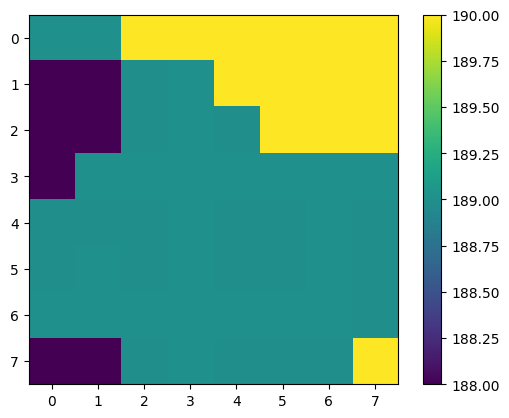

In [17]:
show_image(undcted)

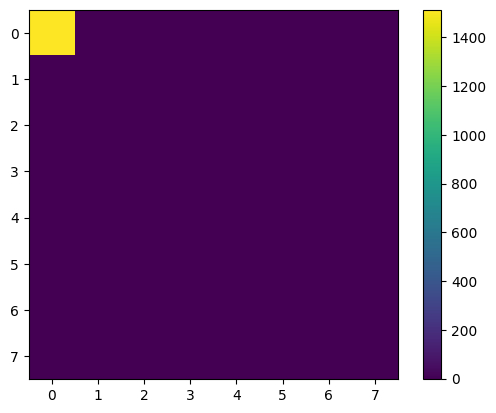

In [20]:
show_image(dcted)